In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv(r"C:\Users\dell\Jupyter Notebooks\diamonds.csv\diamonds.csv")

In [6]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.drop("Unnamed: 0",axis=1,inplace= True)

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


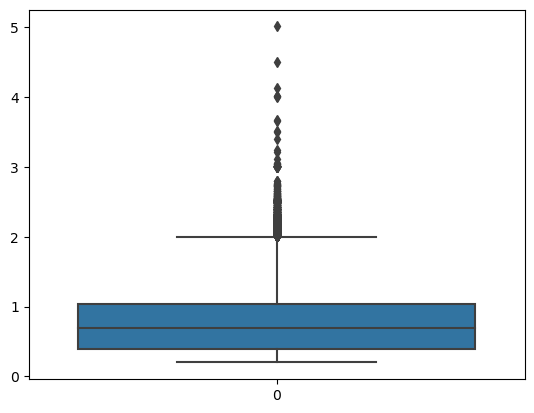

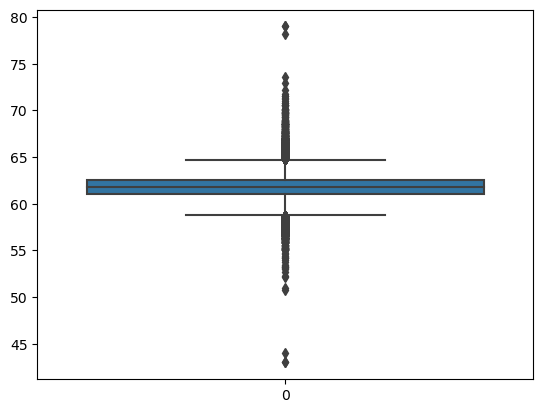

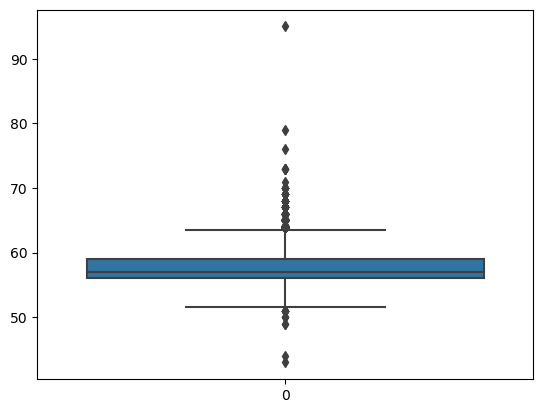

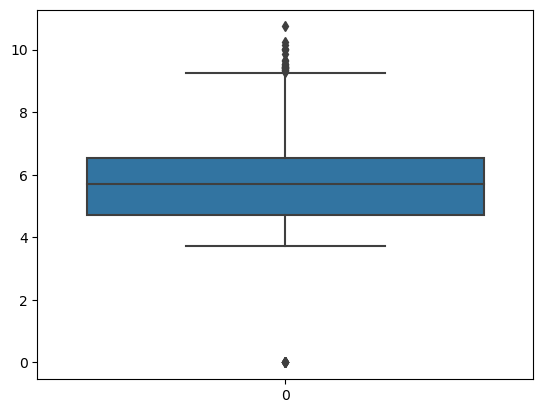

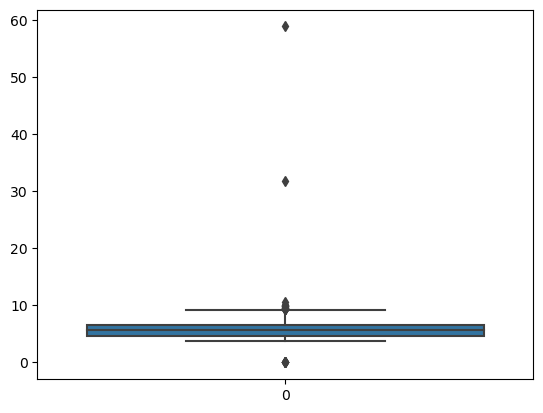

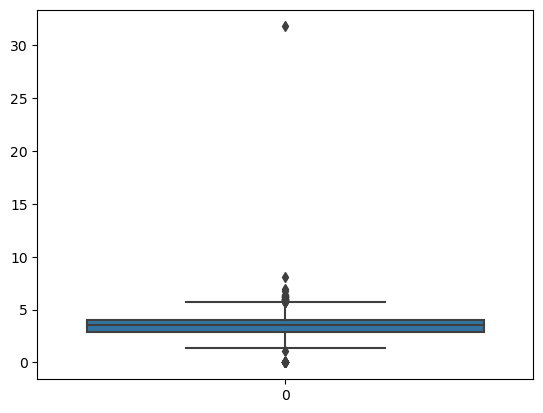

In [12]:
for i in df.select_dtypes(include="float64").columns:
    sns.boxplot(df[i])
    plt.show()

In [13]:
X = df.drop('price',axis = 1)
y = df['price']

In [14]:
X.shape,y.shape

((53940, 9), (53940,))

In [15]:
cont_cols = X.select_dtypes(exclude = "object").columns
cat_cols = X.select_dtypes(include = "object").columns

In [16]:
cont_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [17]:
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [34]:
cont_pl = Pipeline(steps = [('Scaling',RobustScaler()),
                            ('Power Transformation',PowerTransformer())])

In [35]:
cat_nominal_pl = Pipeline(steps=[('Nominal Encoding',OneHotEncoder(drop='first',sparse_output=False))])

In [36]:
cat_ordinal_pl = Pipeline(steps=[('Ordinal Encoding',OrdinalEncoder())])

In [121]:
ct = ColumnTransformer(transformers = [('Continuous transformer',cont_pl,[0,4,5,6,7,8]),
                                      ('Cat NOminal transformer',cat_nominal_pl,[2,3]),
                                      ('Cat Ordinal transformer',cat_ordinal_pl,[1])],remainder='passthrough'
                      )

In [122]:
X.head(1)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43


In [123]:
final_pl = Pipeline(steps=[('final_ct',ct),
                          ('Model-LR',LinearRegression())])

In [124]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.30,random_state = 100)

In [125]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((37758, 9), (16182, 9), (37758,), (16182,))

In [126]:
final_pl.fit(Xtrain,ytrain)

Pipeline(steps=[('final_ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Continuous transformer',
                                                  Pipeline(steps=[('Scaling',
                                                                   RobustScaler()),
                                                                  ('Power '
                                                                   'Transformation',
                                                                   PowerTransformer())]),
                                                  [0, 4, 5, 6, 7, 8]),
                                                 ('Cat NOminal transformer',
                                                  Pipeline(steps=[('Nominal '
                                                                   'Encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  [2, 3]),
                                                 ('Cat Ordinal transformer',
                                                  Pipeline(steps=[('Ordinal '
                                                                   'Encoding',
                                                                   OrdinalEncoder())]),
                                                  [1])])),
                ('Model-LR', LinearRegression())])

In [127]:
final_pl[0].get_feature_names_out()

array(['Continuous transformer__carat', 'Continuous transformer__depth',
       'Continuous transformer__table', 'Continuous transformer__x',
       'Continuous transformer__y', 'Continuous transformer__z',
       'Cat NOminal transformer__color_E',
       'Cat NOminal transformer__color_F',
       'Cat NOminal transformer__color_G',
       'Cat NOminal transformer__color_H',
       'Cat NOminal transformer__color_I',
       'Cat NOminal transformer__color_J',
       'Cat NOminal transformer__clarity_IF',
       'Cat NOminal transformer__clarity_SI1',
       'Cat NOminal transformer__clarity_SI2',
       'Cat NOminal transformer__clarity_VS1',
       'Cat NOminal transformer__clarity_VS2',
       'Cat NOminal transformer__clarity_VVS1',
       'Cat NOminal transformer__clarity_VVS2',
       'Cat Ordinal transformer__cut'], dtype=object)

In [128]:
final_pl.predict(Xtest)

array([2909.39360012, 8364.80444866, 1001.73546882, ..., 1847.22823054,
        673.20835363, 4759.09379588])

## Create a pickle file

In [129]:
import pickle

In [130]:
pickle.dump(final_pl,open('estimator1.pkl','wb'))

In [131]:
import os
os.getcwd()

'C:\\Users\\dell\\Jupyter Notebooks'

In [132]:
predict = pickle.load(open('estimator1.pkl','rb'))

In [133]:
predict.predict([[0.23,'Ideal','E','SI2',61.5,55.0,3.95,3.98,2.43]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([-2517.82916548])

In [134]:
X['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)